##                            MIS 6341: ML Project 2  ( Classification Task)
 
                     Group 5: Shishir Sharma(sxs200126) , Spurti Hayatnagarkar(sxh180041)
                             

##  Dataset : Airline Passenger Satisfaction

source: https://www.kaggle.com/teejmahal20/airline-passenger-satisfaction


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline
%matplotlib notebook

#For model evaluation and development
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


import warnings
warnings.filterwarnings('ignore')



In [154]:
airlinedf=pd.read_csv('test.csv')
print('Shape of dataset:', airlinedf.shape) 

Shape of dataset: (25976, 25)


In [155]:
airlinedf.head(15)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,5,39177,Male,Loyal Customer,16,Business travel,Eco,311,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,6,79433,Female,Loyal Customer,77,Business travel,Business,3987,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,7,97286,Female,Loyal Customer,43,Business travel,Business,2556,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,8,27508,Male,Loyal Customer,47,Business travel,Eco,556,5,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,9,62482,Female,Loyal Customer,46,Business travel,Business,1744,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


In [156]:
#There were no missing values present in the dataset. So I am generating missing values.
cols = [2,6,7,17,14,18]
np.random.seed(0)
masking_array = np.random.randint(120, size = (airlinedf.shape[0], 6)) < 90
airlinedf[airlinedf.columns[cols]] = airlinedf[airlinedf.columns[cols]].where(masking_array, np.nan)

In [157]:
#Checking the null values 

print('\n Total no of Missing values:',airlinedf.isnull().values.sum())
print('Missing values : \n',airlinedf.isnull().sum())


 Total no of Missing values: 39366
Missing values : 
 Unnamed: 0                              0
id                                      0
Gender                               6588
Customer Type                           0
Age                                     0
Type of Travel                          0
Class                                6490
Flight Distance                      6571
Inflight wifi service                   0
Departure/Arrival time convenient       0
Ease of Online booking                  0
Gate location                           0
Food and drink                          0
Online boarding                         0
Seat comfort                         6476
Inflight entertainment                  0
On-board service                        0
Leg room service                     6576
Baggage handling                     6582
Checkin service                         0
Inflight service                        0
Cleanliness                             0
Departure Delay in Mi

In [158]:
airlinedf.drop(['id'],inplace=True, axis = 1) # dropping this column because it will be not useful.

In [159]:
airlinedf['satisfaction'].unique()


array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [160]:
#I am mapping 'satisfaction' variable to 0 and 1
airlinedf['satisfaction']= airlinedf['satisfaction'].map({'satisfied':1,'neutral or dissatisfied':0})
airlinedf['satisfaction'].value_counts()

0    14573
1    11403
Name: satisfaction, dtype: int64

In [161]:
airlinedf['Gender'].value_counts()

Female    9792
Male      9596
Name: Gender, dtype: int64

In [162]:
#There are some missing value in 'Gender' column , replacing them with most frequent gender travel
#and mapping column to 0 and 1 
airlinedf['Gender'].unique()


array(['Female', nan, 'Male'], dtype=object)

In [163]:
airlinedf['Gender'].fillna('Female',inplace = True)


In [164]:
airlinedf['Gender']= airlinedf['Gender'].map({'Male':1,'Female':0})
airlinedf['Gender'].value_counts()

0    16380
1     9596
Name: Gender, dtype: int64

In [165]:
#Here 'Customer type' column mapping 0 and 1 
airlinedf['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [166]:
airlinedf['Customer Type']= airlinedf['Customer Type'].map({'Loyal Customer':1,'disloyal Customer':0})
airlinedf['Customer Type'].value_counts()

1    21177
0     4799
Name: Customer Type, dtype: int64

In [167]:
#In the 'Class' column, missing values are replaced by most frequent class and using one hot vector .

airlinedf['Class'].unique()

array(['Eco', 'Business', nan, 'Eco Plus'], dtype=object)

In [168]:
airlinedf['Class'].value_counts()

Business    9393
Eco         8640
Eco Plus    1453
Name: Class, dtype: int64

In [169]:
airlinedf['Class'].fillna('Eco',inplace = True)
airlinedf['Class'].value_counts()

Eco         15130
Business     9393
Eco Plus     1453
Name: Class, dtype: int64

In [170]:
one_hot = pd.get_dummies(airlinedf['Class'],prefix='Class')
airlinedf = airlinedf.drop('Class',axis = 1)
airlinedf = airlinedf.join(one_hot)

In [171]:
#airlinedf = airlinedf(['Type of Travel'])
airlinedf['Type of Travel'].value_counts()


Business travel    18038
Personal Travel     7938
Name: Type of Travel, dtype: int64

In [172]:
one_hot = pd.get_dummies(airlinedf['Type of Travel'],prefix='Type of Travel')
airlinedf = airlinedf.drop('Type of Travel',axis = 1)
airlinedf = airlinedf.join(one_hot)

In [173]:
airlinedf['Flight Distance'].value_counts()

337.0     138
594.0      84
862.0      78
391.0      74
447.0      73
         ... 
2215.0      1
1950.0      1
2527.0      1
2871.0      1
434.0       1
Name: Flight Distance, Length: 3049, dtype: int64

In [174]:
#Missing values in 'Flight Distance' column replace by median of flight distance .
airlinedf['Flight Distance'].fillna(airlinedf['Flight Distance'].median(), inplace=True)

In [175]:
airlinedf['Seat comfort'].unique()

array([ 3., nan,  2.,  4.,  5.,  1.])

In [176]:
airlinedf['Seat comfort'].value_counts()

4.0    6054
5.0    4955
3.0    3539
2.0    2682
1.0    2270
Name: Seat comfort, dtype: int64

In [177]:
airlinedf['Seat comfort'].fillna(4.0, inplace=True)

airlinedf['Seat comfort'].value_counts()


4.0    12530
5.0     4955
3.0     3539
2.0     2682
1.0     2270
Name: Seat comfort, dtype: int64

In [178]:
airlinedf['Leg room service'].value_counts()

4.0    5293
5.0    4709
3.0    3705
2.0    3681
1.0    1909
0.0     103
Name: Leg room service, dtype: int64

In [179]:
airlinedf['Leg room service'].fillna(1.0, inplace=True)

In [180]:
airlinedf['Baggage handling'].value_counts()

4.0    6988
5.0    5046
3.0    3898
2.0    2104
1.0    1358
Name: Baggage handling, dtype: int64

In [181]:
airlinedf['Baggage handling'].fillna(3.0, inplace=True)

In [182]:
airlinedf['Arrival Delay in Minutes'].value_counts()

0.0      14594
1.0        536
2.0        523
3.0        490
4.0        466
         ...  
347.0        1
350.0        1
320.0        1
159.0        1
403.0        1
Name: Arrival Delay in Minutes, Length: 320, dtype: int64

In [183]:
airlinedf['Arrival Delay in Minutes'].fillna(airlinedf['Arrival Delay in Minutes'].median(), inplace=True)

In [184]:
airlinedf.drop(['Unnamed: 0'],inplace=True, axis = 1) 

In [185]:
airlinedf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 26 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             25976 non-null  int64  
 1   Customer Type                      25976 non-null  int64  
 2   Age                                25976 non-null  int64  
 3   Flight Distance                    25976 non-null  float64
 4   Inflight wifi service              25976 non-null  int64  
 5   Departure/Arrival time convenient  25976 non-null  int64  
 6   Ease of Online booking             25976 non-null  int64  
 7   Gate location                      25976 non-null  int64  
 8   Food and drink                     25976 non-null  int64  
 9   Online boarding                    25976 non-null  int64  
 10  Seat comfort                       25976 non-null  float64
 11  Inflight entertainment             25976 non-null  int

<IPython.core.display.Javascript object>


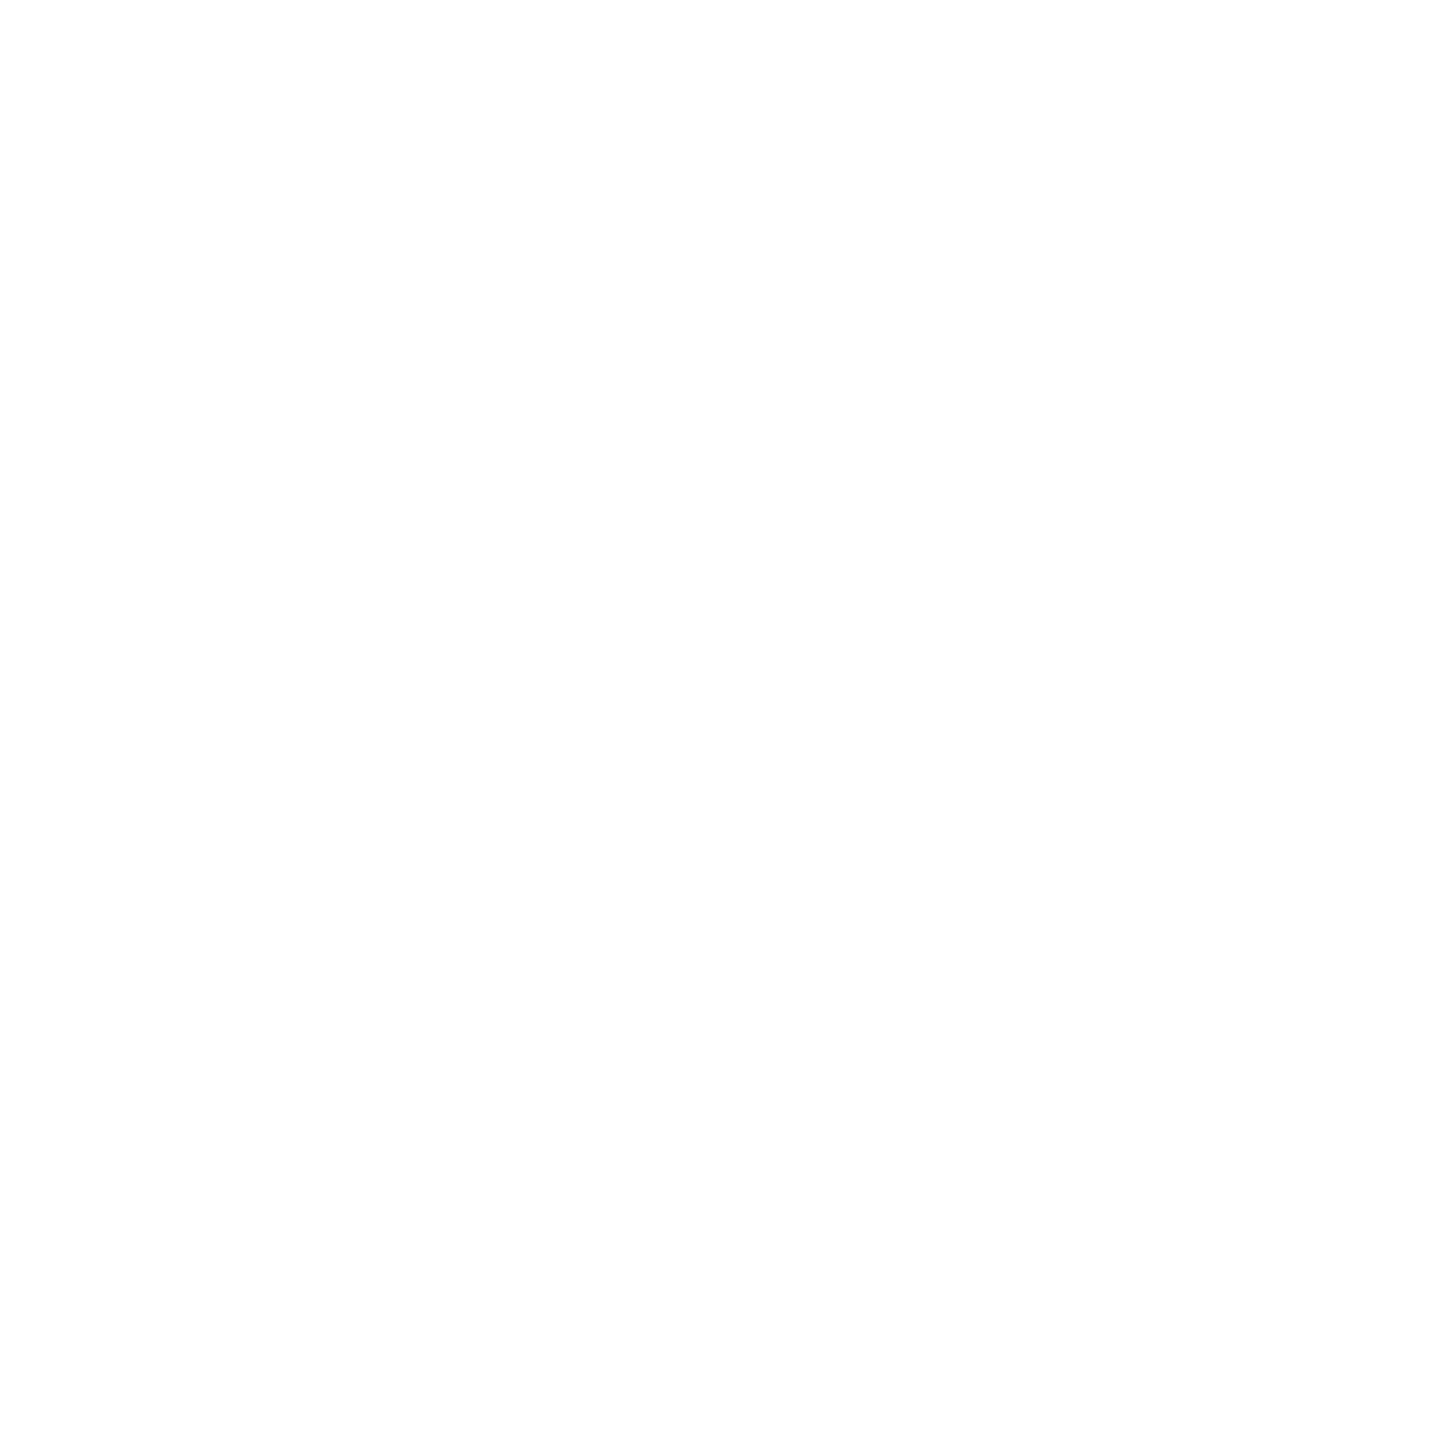

In [186]:
airlinedf.hist(figsize=(20,20));

<IPython.core.display.Javascript object>


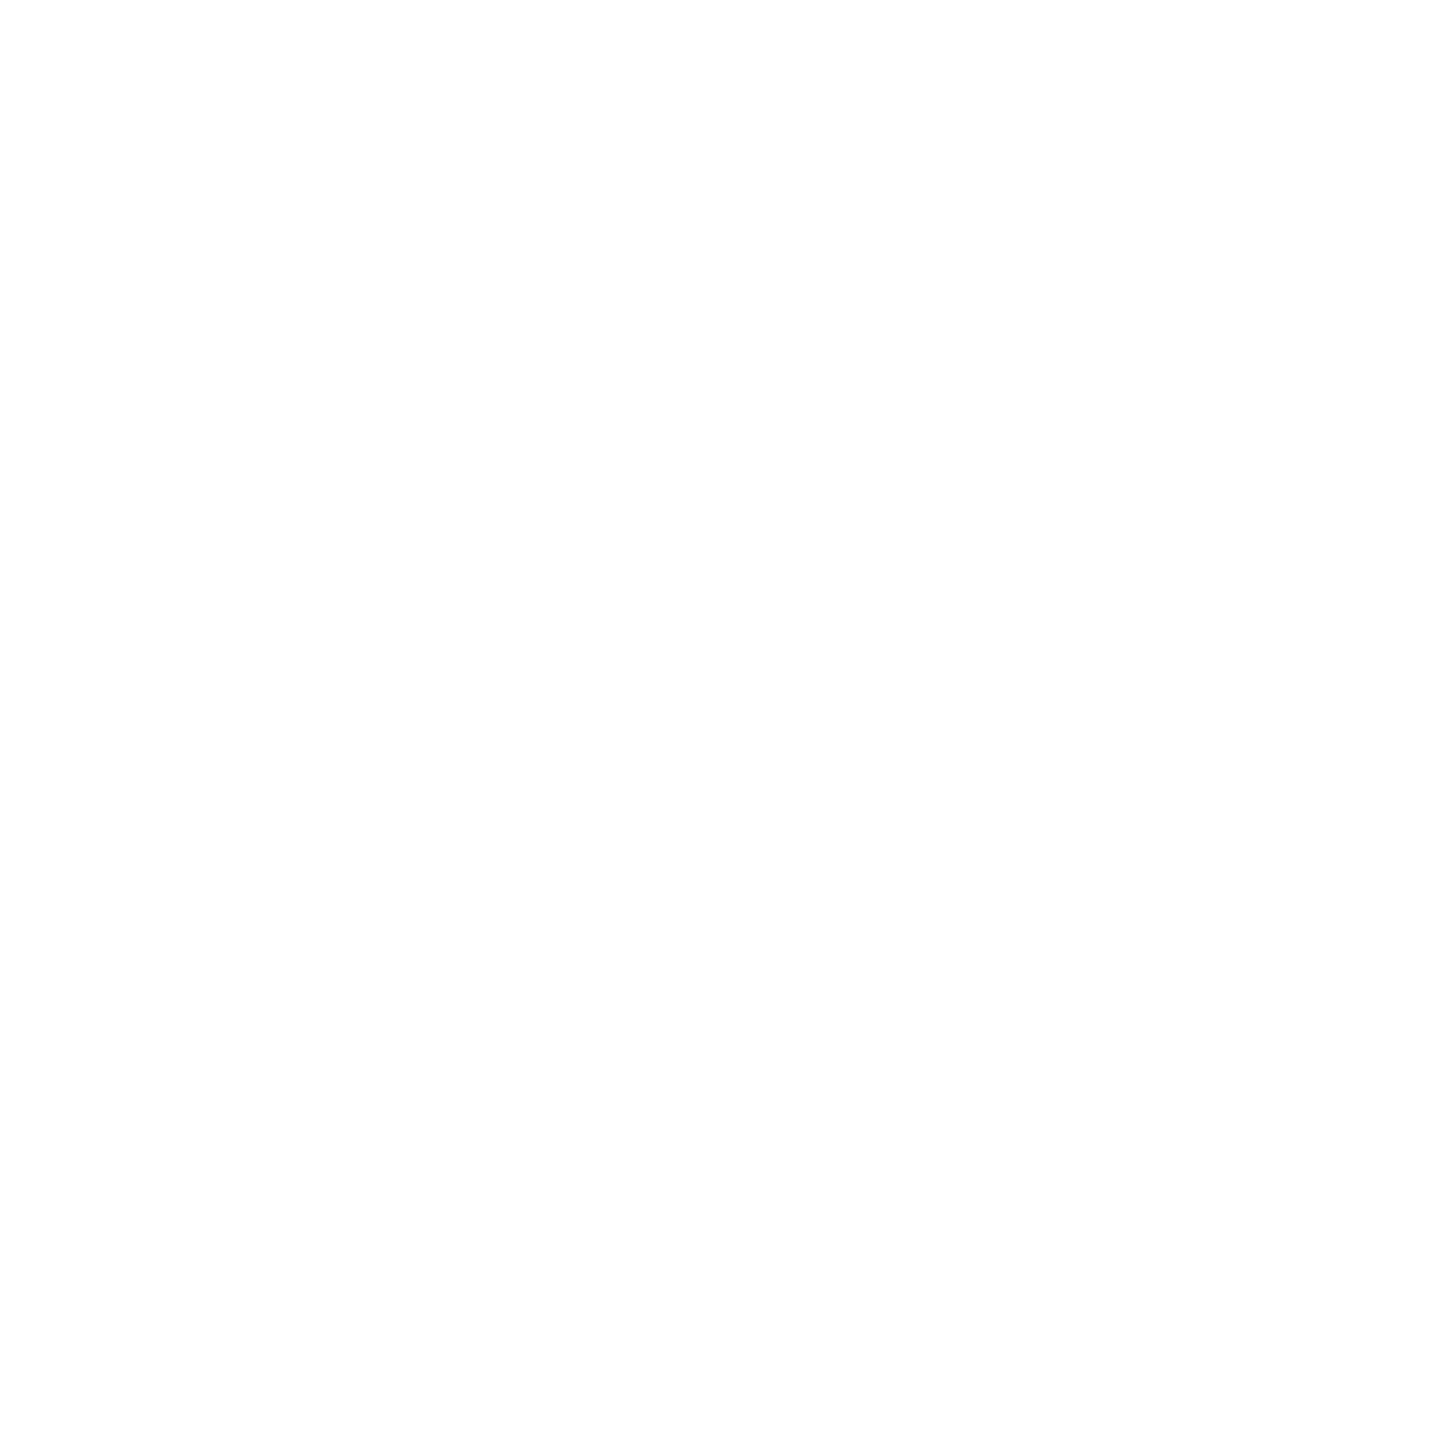

In [187]:
plt.figure(figsize=(20,20))
sns.heatmap(airlinedf.corr(), annot=True);

In [188]:
airlinedf1=airlinedf.sample(n=2000)
airlinedf1.shape



(2000, 26)

In [189]:
target_var=airlinedf1['satisfaction']
airlinedf1 = airlinedf1.drop('satisfaction',axis=1)



## Data Preparation

In [190]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


Xtrainss2, xtestss2, ytrainss2, ytestss2 = train_test_split(airlinedf1, target_var, random_state=0,test_size=0.2)


MinMax Scaler helps normalize the data. Since the scale of values in the columns are different, they can have different impact on the coefficients of the models. In order normalize the impact of features during prediction we used the Min Max Scalar.



In [191]:
scaler = MinMaxScaler()
XTrainss2 = scaler.fit_transform(Xtrainss2)
XTestss2 = scaler.transform(xtestss2)

XTrainss2  = pd.DataFrame(XTrainss2)
XTestss2 = pd.DataFrame(XTestss2)
XTrainss2.columns = airlinedf1.columns
XTestss2.columns = airlinedf1.columns


# Voting Classification



####  Grid search for logistic 

In [192]:
paramgridlog = { 'max_iter' : range(1,200), 
                  'penalty' : ['l1','l2'],
                'C' : [ 0.1, 1, 10, 100]}

gslog = GridSearchCV(estimator = LogisticRegression(),param_grid =paramgridlog, cv = 5, verbose = 1, n_jobs = -1)
gslogmodel = gslog.fit(XTrainss2, ytrainss2)

print('Best score',gslogmodel.best_score_)
print('Best Parameter',gslog.best_params_)


Fitting 5 folds for each of 1592 candidates, totalling 7960 fits
Best score 0.865625
Best Parameter {'C': 100, 'max_iter': 27, 'penalty': 'l2'}


#### Grid search for decision tree

In [193]:
paramgriddc = {'max_depth': np.arange(1, 7)}
griddc = GridSearchCV(DecisionTreeClassifier(random_state=0), paramgriddc, cv=10, return_train_score=True, verbose=True)
griddc.fit(XTrainss2, ytrainss2)

print("Best parameters: {}".format(griddc.best_params_))
print("Best cross-validation score: {:.6f}".format(griddc.best_score_))

Fitting 10 folds for each of 6 candidates, totalling 60 fits
Best parameters: {'max_depth': 6}
Best cross-validation score: 0.915000


### Hard voting

In [194]:
from sklearn.ensemble import VotingClassifier
loghv = LogisticRegression(random_state= 0, C = 100, max_iter = 27)
loghv.fit(XTrainss2, ytrainss2)

dthv = DecisionTreeClassifier(max_depth = 6, random_state = 0)
dthv.fit(XTrainss2, ytrainss2)


Hvoting = VotingClassifier(estimators=[('lr', loghv), ('dt', dthv),], voting='hard')
Hvoting.fit(XTrainss2, ytrainss2)


for clfss in (loghv, dthv, Hvoting):
    clfss.fit(XTrainss2, ytrainss2)
    ypredss22 = clfss.predict(XTestss2)
    print(clfss.__class__.__name__, '%.4f'%accuracy_score(ytestss2, ypredss22))

LogisticRegression 0.8575
DecisionTreeClassifier 0.8875
VotingClassifier 0.8675


### Soft Voting

In [195]:
logsv = LogisticRegression(random_state= 0, C = 100, max_iter = 27)
logsv.fit(XTrainss2, ytrainss2)

dtsv = DecisionTreeClassifier(max_depth = 8, random_state = 0)
dtsv.fit(XTrainss2, ytrainss2)

Svoting = VotingClassifier(estimators=[('lr', logsv), ('dt', dtsv)], voting='soft')
Svoting.fit(XTrainss2, ytrainss2)

for clfss in (logsv, dtsv,Svoting):
    clfss.fit(XTrainss2, ytrainss2)
    ypredss22 = clfss.predict(XTestss2)
    print(clfss.__class__.__name__, '%.4f'%accuracy_score(ytestss2, ypredss22))


LogisticRegression 0.8575
DecisionTreeClassifier 0.9000
VotingClassifier 0.9100


# Bagging Classifier

### 1.Bagging on decision Tree

__Grid search for Bagging__

In [196]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

paramgridss2 = {'n_estimators':[200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

bagclfss = BaggingClassifier(DecisionTreeClassifier(random_state = 0))
baggridss = GridSearchCV(bagclfss, paramgridss2, cv = 5, n_jobs = -1)
baggridss.fit(XTrainss2, ytrainss2)

print('Best Parameters:',baggridss.best_params_)
print('Best Score:',baggridss.best_score_)

Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 300}
Best Score: 0.9325000000000001


#### Grid search for decision tree

In [197]:
paramgriddc = {'max_depth': np.arange(1, 10)}
griddc = GridSearchCV(DecisionTreeClassifier(random_state=0), paramgriddc, cv=10, return_train_score=True, verbose=True)
griddc.fit(XTrainss2, ytrainss2)

print("Best parameters",(griddc.best_params_))
print("Best score",(griddc.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters {'max_depth': 6}
Best score 0.915


__Bagging classifier using best parameters__

In [198]:
bagclfss = BaggingClassifier(DecisionTreeClassifier(max_depth = 6, random_state = 0), 
                           bootstrap= True, max_features= 0.5,max_samples=baggridss.best_params_['max_samples'] ,
                           n_estimators= baggridss.best_params_['n_estimators'], oob_score= True)

bagclfss.fit(XTrainss2, ytrainss2)
ypredss2 = bagclfss.predict(XTestss2)

print('Train score:',bagclfss.score(XTrainss2, ytrainss2))
print('Test score:',bagclfss.score(XTestss2, ytestss2))
print('Out-of-bag score:',bagclfss.oob_score_)
print("Accuracy : ", accuracy_score(ytestss2, ypredss22))

Train score: 0.9575
Test score: 0.915
Out-of-bag score: 0.93
Accuracy :  0.91


In [199]:

bagclfss_mat = confusion_matrix(ypredss22,ytestss2)
print(" Matrix \n{}".format(bagclfss_mat))


 Matrix 
[[217  14]
 [ 22 147]]


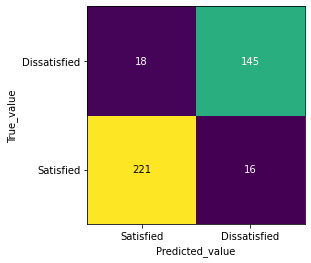

In [200]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")



In [201]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.93      0.92      0.93       239
Dissatisfied       0.89      0.90      0.90       161

    accuracy                           0.92       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.92      0.92      0.92       400



### 2. Bagging on Random Forest

#### Grid search for Random forest 

In [202]:
paramgridss = {'n_estimators': [100,200,300,400],
              'max_depth': [1,2,3,4,5,6,7,8,9,10]}

gridsearchpcass = GridSearchCV(RandomForestClassifier(), paramgridss, cv=10, return_train_score=True)
gridsearchpcass.fit(XTrainss2, ytrainss2)
print("Best parameters: ",(gridsearchpcass.best_params_))
print("Best cross-validation score: ",(gridsearchpcass.best_score_))

Best parameters:  {'max_depth': 9, 'n_estimators': 200}
Best cross-validation score:  0.93125


In [203]:
rndss = RandomForestClassifier(n_estimators=300, max_depth = 10, bootstrap=True, n_jobs=-1, random_state=0)
rndss.fit(XTrainss2, ytrainss2)

ypredss2 = rndss.predict(XTestss2)

print('Train score : ',(rndss.score(XTrainss2, ytrainss2)))
print('Test score ',(rndss.score(XTestss2, ytestss2)))
print("Accuracy  : ", accuracy_score(ytestss2, ypredss2).round(4))

Train score :  0.99
Test score  0.91
Accuracy  :  0.91


In [204]:

bagclfss_mat = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(bagclfss_mat))


matrix 
[[218  15]
 [ 21 146]]


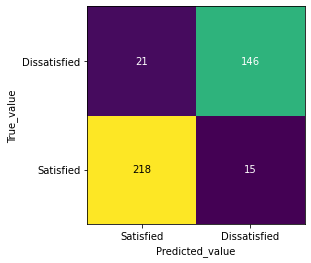

In [205]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [206]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.94      0.91      0.92       239
Dissatisfied       0.87      0.91      0.89       161

    accuracy                           0.91       400
   macro avg       0.90      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



([<matplotlib.axis.YTick at 0x7fb3c801f1f0>,
 [Text(0, 0, 'Gender'),
  Text(0, 1, 'Customer Type'),
  Text(0, 2, 'Age'),
  Text(0, 3, 'Flight Distance'),
  Text(0, 4, 'Inflight wifi service'),
  Text(0, 5, 'Departure/Arrival time convenient'),
  Text(0, 6, 'Ease of Online booking'),
  Text(0, 7, 'Gate location'),
  Text(0, 8, 'Food and drink'),
  Text(0, 9, 'Online boarding'),
  Text(0, 10, 'Seat comfort'),
  Text(0, 11, 'Inflight entertainment'),
  Text(0, 12, 'On-board service'),
  Text(0, 13, 'Leg room service'),
  Text(0, 14, 'Baggage handling'),
  Text(0, 15, 'Checkin service'),
  Text(0, 16, 'Inflight service'),
  Text(0, 17, 'Cleanliness'),
  Text(0, 18, 'Departure Delay in Minutes'),
  Text(0, 19, 'Arrival Delay in Minutes'),
  Text(0, 20, 'Class_Business'),
  Text(0, 21, 'Class_Eco'),
  Text(0, 22, 'Class_Eco Plus'),
  Text(0, 23, 'Type of Travel_Business travel'),
  Text(0, 24, 'Type of Travel_Personal Travel')])

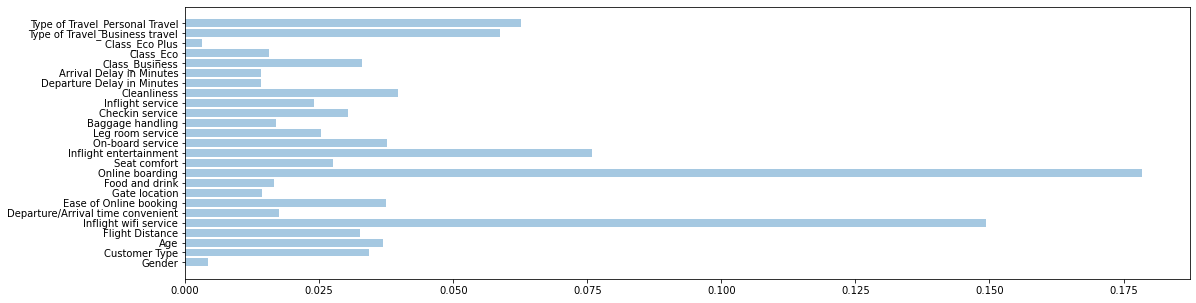

In [207]:
plt.subplots(figsize = (18,5))
ylistss = rndss.feature_importances_
yposss = np.arange(len(ylistss))
features = XTestss2.columns
plt.barh(yposss, ylistss, align='center', alpha=0.4)
plt.yticks(yposss, features)




### Pasting Classifier

### 1. Pasting on Decision Tree Classifier

#### Grid search for Pasting



In [208]:
paramgridss2 = {'n_estimators':[100,200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

bagclfss = BaggingClassifier(DecisionTreeClassifier(random_state = 0))
baggridss = GridSearchCV(bagclfss,paramgridss2, cv = 5, n_jobs = -1)
baggridss.fit(XTrainss2, ytrainss2)

print('Best Parameters:',baggridss.best_params_)
print('Best Score:',baggridss.best_score_)


Best Parameters: {'max_features': 0.5, 'max_samples': 0.4, 'n_estimators': 200}
Best Score: 0.931875



#### Grid search for decision tree


In [209]:
paramgriddc = {'max_depth': np.arange(1, 10)}
griddc = GridSearchCV(DecisionTreeClassifier(random_state=0), paramgriddc, cv=10, return_train_score=True, verbose=True)
griddc.fit(XTrainss2, ytrainss2)

print("Best parameters:",(griddc.best_params_))
print("Best cross-validation score:",(griddc.best_score_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
Best parameters: {'max_depth': 6}
Best cross-validation score: 0.915


In [210]:
clfps = BaggingClassifier(DecisionTreeClassifier(max_depth = 6, random_state = 0), 
                           bootstrap= False, max_features= 0.4,
                          max_samples=baggridss.best_params_['max_samples'] ,
                           n_estimators= baggridss.best_params_['n_estimators'])

clfps.fit(XTrainss2, ytrainss2)
ypredss2 = clfps.predict(XTestss2)

print('Train score: %.2f'%clfps.score(XTrainss2, ytrainss2))
print('Test score: %.2f'%clfps.score(XTestss2, ytestss2))
print("Accuracy : ", accuracy_score(ytestss2, ypredss2))


Train score: 0.95
Test score: 0.91
Accuracy :  0.91


In [211]:

clfpsmat = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(clfpsmat))

matrix 
[[221  18]
 [ 18 143]]


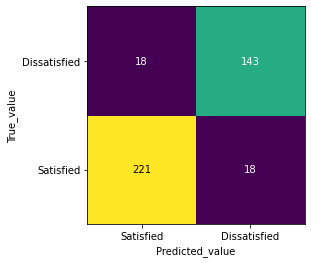

In [212]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [213]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.92      0.92      0.92       239
Dissatisfied       0.89      0.89      0.89       161

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



### 2. Pasting on LogisticRegressor

#### Grid search for pasting

In [214]:
paramgridss2 = {'n_estimators':[100,200, 300, 400, 500], 
              'max_samples':[0.1, 0.2, 0.3, 0.4, 0.5], 
              'max_features':[0.1, 0.2, 0.3, 0.5]}

bagclfss = BaggingClassifier(DecisionTreeClassifier(random_state = 0))
baggridss = GridSearchCV(bagclfss,paramgridss2, cv = 5, n_jobs = -1)
baggridss.fit(XTrainss2, ytrainss2)

print('Best Parameters:',baggridss.best_params_)
print('Best Score:',baggridss.best_score_)


Best Parameters: {'max_features': 0.5, 'max_samples': 0.5, 'n_estimators': 300}
Best Score: 0.9324999999999999


#### Grid search for logistic 

In [215]:
paramgridlog = { 'max_iter' : range(1,200), 
                  'penalty' : ['l1','l2'],
                'C' : [ 0.1, 1, 10, 100]}

gslog = GridSearchCV(estimator = LogisticRegression(),param_grid =paramgridlog, cv = 5, verbose = 1, n_jobs = -1)
gslogmodel = gslog.fit(XTrainss2, ytrainss2)

print('Best score',gslogmodel.best_score_)
print('Best Parameter',gslog.best_params_)


Fitting 5 folds for each of 1592 candidates, totalling 7960 fits
Best score 0.865625
Best Parameter {'C': 100, 'max_iter': 27, 'penalty': 'l2'}


In [216]:
lrpsclf = BaggingClassifier(LogisticRegression(penalty ='l2', C = 10, max_iter = 17), 
                           bootstrap= False, max_features= baggridss.best_params_['max_features'],max_samples= baggridss.best_params_['max_samples'],
                           n_estimators= baggridss.best_params_['n_estimators'])

lrpsclf.fit(XTrainss2, ytrainss2)
ypredss2 = lrpsclf.predict(XTestss2)

print('Train score: %.2f'%lrpsclf.score(XTrainss2, ytrainss2))
print('Test score: %.2f'%lrpsclf.score(XTestss2, ytestss2))
print("Accuracy : ", accuracy_score(ytestss2, ypredss2))


Train score: 0.86
Test score: 0.85
Accuracy :  0.8475


In [217]:
lrpsmat = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(lrpsmat))

matrix 
[[212  34]
 [ 27 127]]


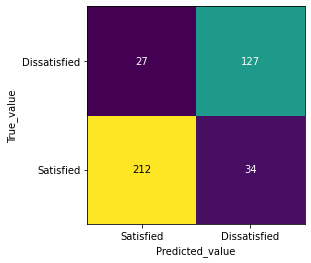

In [218]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [219]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.86      0.89      0.87       239
Dissatisfied       0.82      0.79      0.81       161

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



# AdaBoost boosting


### 1. AdaBoost boosting on Decision Tree

#### Grid search for AdaBoostClassifier

In [220]:
paramgridss = {'n_estimators': [100,500,1000] ,
              'learning_rate': [0.1,0.5,1]}


addt= AdaBoostClassifier(DecisionTreeClassifier(random_state = 0))
gridaddt = GridSearchCV(addt, paramgridss, cv = 5 )
gridaddt.fit(XTrainss2, ytrainss2)

print('Best parameters:',gridaddt.best_params_ )
print('Best Score:',gridaddt.best_score_)


Best parameters: {'learning_rate': 1, 'n_estimators': 500}
Best Score: 0.8856249999999999


#### Grid seach for decision tree

In [221]:
paramgridss = {'max_depth': np.arange(1, 10)}
gridsearchpcass = GridSearchCV(DecisionTreeClassifier(random_state=0), paramgridss, cv=5, 
                           return_train_score=True, verbose=True)

gridsearchpcass.fit(XTrainss2, ytrainss2)

print("Best parameters: {}".format(gridsearchpcass.best_params_))
print("Best cross-validation score: {:.6f}".format(gridsearchpcass.best_score_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters: {'max_depth': 8}
Best cross-validation score: 0.905625


#### Using best parameters for AdaBoostclassifier 

In [222]:
adadt = AdaBoostClassifier(DecisionTreeClassifier(max_depth = 8, random_state = 0),
n_estimators=gridaddt.best_params_['n_estimators'], learning_rate=gridaddt.best_params_['learning_rate'], random_state=0)

adadt.fit(XTrainss2, ytrainss2)
ypredss2 = adadt.predict(XTestss2)


print('Test score:',adadt.score(XTestss2, ytestss2))
print('Train score:',adadt.score(XTrainss2, ytrainss2))
print("Accuracy : ",accuracy_score(ytestss2, ypredss2).round(4))

Test score: 0.9125
Train score: 1.0
Accuracy :  0.9125


In [223]:
addtmat = confusion_matrix(ypredss2,ytestss2)
print("matrix",(addtmat))

matrix [[220  16]
 [ 19 145]]


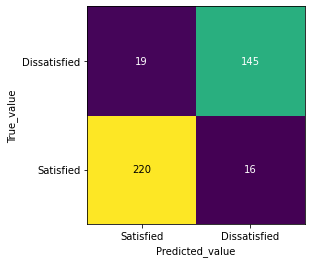

In [224]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [225]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.93      0.92      0.93       239
Dissatisfied       0.88      0.90      0.89       161

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



### 2. AdaBoost boosting on Logistic Regressor

#### grid search for AdaBoost

In [226]:
paramgridss = {'n_estimators': [100,200,300,400,500],
              'learning_rate': [.01, .05, .1, 1]}

gridad = GridSearchCV(AdaBoostClassifier(LogisticRegression(),random_state = 0),
                           paramgridss, cv=5, return_train_score=True)
gridad.fit(XTrainss2, ytrainss2)
print("Best parameters: {}".format(gridad.best_params_))
print("Best cross-validation score: {:.2f}".format(gridad.best_score_))

Best parameters: {'learning_rate': 0.1, 'n_estimators': 500}
Best cross-validation score: 0.86


#### Grid search for logistic 

In [227]:
paramgridlog = { 'max_iter' : range(1,200), 
                  'penalty' : ['l1','l2'],
                'C' : [ 0.1, 1, 10, 100]}

gslog = GridSearchCV(estimator = LogisticRegression(),param_grid =paramgridlog, cv = 5, verbose = 1, n_jobs = -1)
gslogmodel = gslog.fit(XTrainss2, ytrainss2)

print('Best score',gslogmodel.best_score_)
print('Best Parameter',gslog.best_params_)


Fitting 5 folds for each of 1592 candidates, totalling 7960 fits
Best score 0.865625
Best Parameter {'C': 100, 'max_iter': 27, 'penalty': 'l2'}


#### using best parameters AdaBoostClassifier

In [228]:

adalr = AdaBoostClassifier(LogisticRegression(penalty ='l2', C = 100, max_iter = 27),
                             n_estimators=gridad.best_params_['n_estimators'], algorithm="SAMME.R", 
                           learning_rate=gridad.best_params_['learning_rate'], random_state=0)

adalr.fit(XTrainss2, ytrainss2)
ypredlr = adalr.predict(XTestss2)

print('Train score:',adalr.score(XTrainss2, ytrainss2))
print('Test score:',adalr.score(XTestss2, ytestss2))
print("Accuracy: ",accuracy_score(ytestss2, ypredlr).round(4))


Train score: 0.858125
Test score: 0.84
Accuracy:  0.84


In [229]:
adlrmat = confusion_matrix(ypredlr,ytestss2)
print("matrix",(adlrmat))

matrix [[204  29]
 [ 35 132]]


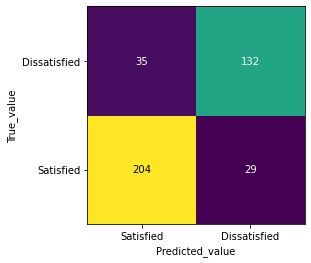

In [230]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredlr, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [231]:
print(classification_report(ytestss2, ypredlr, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.88      0.85      0.86       239
Dissatisfied       0.79      0.82      0.80       161

    accuracy                           0.84       400
   macro avg       0.83      0.84      0.83       400
weighted avg       0.84      0.84      0.84       400



# gradient boosting

#### Grid search for Gradient boosting

In [232]:
paramgridss = {'n_estimators': [100,500,1000],
              'learning_rate': [0.1,0.5,1]}

gbrtss=GradientBoostingClassifier(random_state = 0)
gridgbss = GridSearchCV(gbrtss, paramgridss, cv = 5)
gridgbss.fit(XTrainss2, ytrainss2)

print('Best parameters:',gridgbss.best_params_ )
print('Best Score:',gridgbss.best_score_)



Best parameters: {'learning_rate': 0.1, 'n_estimators': 100}
Best Score: 0.9268750000000001


In [233]:
gbrtss = GradientBoostingClassifier(random_state=0, learning_rate=gridgbss.best_params_['learning_rate'],
                                    n_estimators= gridgbss.best_params_['n_estimators'])

gbrtss.fit(XTrainss2, ytrainss2)
ypredss2 = gbrtss.predict(XTestss2)

print("Train score: {:.3f}".format(gbrtss.score(XTrainss2, ytrainss2)))
print("Test score : {:.3f}".format(gbrtss.score(XTestss2, ytestss2)))
print("Accuracy ",accuracy_score(ytestss2, ypredss2).round(4))


Train score: 0.964
Test score : 0.920
Accuracy  0.92


#### Gradient boostong on decision tree

In [234]:
gbrtss = GradientBoostingClassifier(max_depth =8,learning_rate=gridgbss.best_params_['learning_rate'],
                                    n_estimators= gridgbss.best_params_['n_estimators'])
gbrtss.fit(XTrainss2, ytrainss2)
ypredss2 = gbrtss.predict(XTestss2)

print("Train score: {:.3f}".format(gbrtss.score(XTrainss2, ytrainss2)))
print("Test score".format(gbrtss.score(XTestss2, ytestss2)))
print("Accuracy ",accuracy_score(ytestss2, ypredss2).round(4))

Train score: 1.000
Test score
Accuracy  0.9125


In [235]:
gbrtmat = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(gbrtmat))

matrix 
[[219  15]
 [ 20 146]]


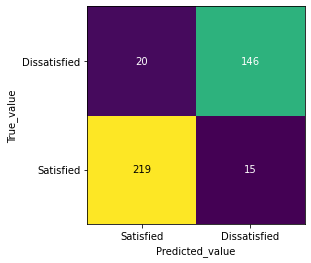

In [236]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [237]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.94      0.92      0.93       239
Dissatisfied       0.88      0.91      0.89       161

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



# PCA for Classification

In [238]:
from sklearn.decomposition import PCA

pcass = PCA(n_components = .95, random_state = 0)
Xtrainpcass = pcass.fit_transform(XTrainss2)
Xtestpcass = pcass.transform(XTestss2)

In [239]:
print("Attributes after PCA :" ,pcass.n_components_ )

Attributes after PCA : 17


## KNN with PCA

#### Grid search for knn 

In [240]:
paramgridss = {'n_neighbors': range(1,20)}
gridsearchpcass = GridSearchCV(KNeighborsClassifier(), paramgridss, cv=5, return_train_score=True, verbose = True)
gridsearchpcass.fit(Xtrainpcass, ytrainss2)

print("Best parameters:",(gridsearchpcass.best_params_))
print("Best cross-validation score:",(gridsearchpcass.best_score_))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best parameters: {'n_neighbors': 9}
Best cross-validation score: 0.8725000000000002


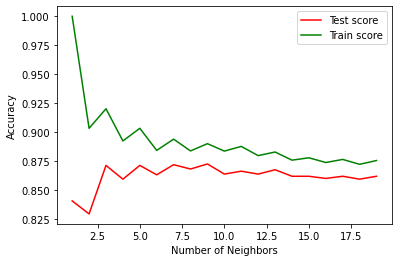

In [241]:
results = pd.DataFrame(gridsearchpcass.cv_results_)
plt.plot(results['param_n_neighbors'],results['mean_test_score'],c='r',label='Test score')
plt.plot(results['param_n_neighbors'],results['mean_train_score'],c='g',label='Train score')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.legend()

#### using best parameters 

In [242]:
knnss = KNeighborsClassifier(n_neighbors=gridsearchpcass.best_params_['n_neighbors'])
knnss.fit(Xtrainpcass, ytrainss2)

ypredss2 = knnss.predict(Xtestpcass)

print('Train score for KNN with PCA {:.3f}'.format(knnss.score(Xtrainpcass,ytrainss2)))
print('Test score for KNN with PCA {:.3f}'.format(knnss.score(Xtestpcass,ytestss2)))

Train score for KNN with PCA 0.891
Test score for KNN with PCA 0.863


In [243]:
conss = confusion_matrix(ypredss2,ytestss2)
print("Matrix \n{}".format(conss))

Matrix 
[[221  37]
 [ 18 124]]


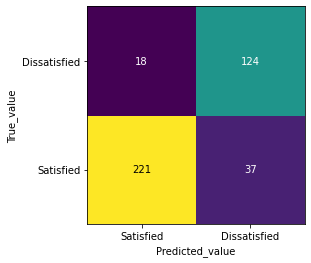

In [244]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [245]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.86      0.92      0.89       239
Dissatisfied       0.87      0.77      0.82       161

    accuracy                           0.86       400
   macro avg       0.86      0.85      0.85       400
weighted avg       0.86      0.86      0.86       400



In [246]:
report_table = [['KNN Classification', 'K=9', knnss.score(Xtrainpcass, ytrainss2)*100, knnss.score(Xtrainpcass, ytrainss2)*100,
                 f1_score(ytestss2, knnss.predict(Xtestpcass))]]

## Logistic with PCA

#### Grid search for Logistic

In [247]:
paramgridss = {'C': [0.1, 1, 10, 100], 
               'penalty':['l1','l2']}

gridsearchpcass = GridSearchCV(LogisticRegression(), paramgridss, cv=5, return_train_score=True)
gridsearchpcass.fit(Xtrainpcass, ytrainss2)

print("Best parameters: {}".format(gridsearchpcass.best_params_))
print("Best score: {:.3f}".format(gridsearchpcass.best_score_))

Best parameters: {'C': 100, 'penalty': 'l2'}
Best score: 0.858


#### Using the best parameters 

In [248]:
logss1 = LogisticRegression(C=gridsearchpcass.best_params_['C'],penalty='l2')

logss1.fit(Xtrainpcass, ytrainss2)
ypredss2 = logss1.predict(Xtestpcass)

print('Train score with PCA {:.3f}'.format(logss1.score(Xtrainpcass,ytrainss2)))
print('Test score with PCA  {:.3f}'.format(logss1.score(Xtestpcass,ytestss2)))

Train score with PCA 0.861
Test score with PCA  0.835


In [249]:
conss = confusion_matrix(ypredss2,ytestss2)
print("Matrix \n{}".format(conss))

Matrix 
[[205  32]
 [ 34 129]]


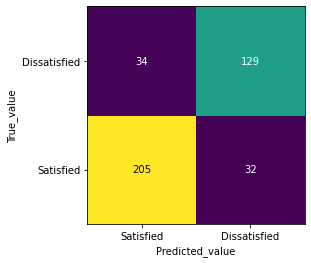

In [250]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [251]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.86      0.86      0.86       239
Dissatisfied       0.79      0.80      0.80       161

    accuracy                           0.83       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.83      0.84       400



In [252]:
report_table = report_table + [['Logistic Regression', 'C=10 & Penalty = l2', logss1.score(Xtrainpcass, ytrainss2)*100, 
                                logss1.score(Xtrainpcass, ytrainss2)*100,
                                f1_score(ytestss2,logss1.predict(Xtestpcass))]]

## SVM with PCA

#### Grid search for best parameters 

In [253]:
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
paramgridss = {'C': [0.1, 1, 10, 100],
              'gamma': [0.1, 1, 10, 100], 
              'degree':[1,2,3,4,5]}

gridsearchpcass = GridSearchCV(SVC(), paramgridss, cv=5, return_train_score=True, n_jobs = -1, verbose = True)
gridsearchpcass.fit(Xtrainpcass, ytrainss2)

print("Best parameters:",(gridsearchpcass.best_params_))
print("Best cross-validation score:",(gridsearchpcass.best_score_))


Fitting 5 folds for each of 80 candidates, totalling 400 fits
Best parameters: {'C': 10, 'degree': 1, 'gamma': 0.1}
Best cross-validation score: 0.9


### Linear SVC

In [254]:
linsvmss = LinearSVC(C=100)

linsvmss.fit(Xtrainpcass, ytrainss2)
ypredss2 = linsvmss.predict(Xtestpcass)


print('Train score for LinearSVC with PCA: {:.3f}'.format(linsvmss.score(Xtrainpcass, ytrainss2)))
print('Test score for LinearSVC with PCA : {:.3f}'.format(linsvmss.score(Xtestpcass,ytestss2)))



Train score for LinearSVC with PCA: 0.846
Test score for LinearSVC with PCA : 0.828


In [255]:
conss = confusion_matrix(ypredss2,ytestss2)
print("Matrix \n{}".format(conss))

Matrix 
[[199  29]
 [ 40 132]]


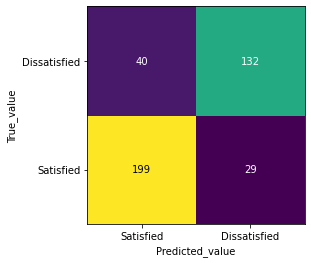

In [256]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [257]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.87      0.83      0.85       239
Dissatisfied       0.77      0.82      0.79       161

    accuracy                           0.83       400
   macro avg       0.82      0.83      0.82       400
weighted avg       0.83      0.83      0.83       400



In [258]:
report_table = report_table + [['Linear SVM', 'C=10 & Penalty = l2', linsvmss.score(Xtrainpcass, ytrainss2)*100, 
                                linsvmss.score(Xtrainpcass, ytrainss2)*100,
                                f1_score(ytestss2,linsvmss.predict(Xtestpcass))]]

## svc kernel "rbf"

In [259]:
rbfss = SVC(kernel='rbf', gamma=0.1, C=10)


rbfss.fit(Xtrainpcass, ytrainss2)
ypredss2 = rbfss.predict(Xtestpcass)

print('Train score for SVC kernel - rbf with PCA: {:.3f}'.format(rbfss.score(Xtrainpcass,ytrainss2)))
print('Test score for SVC kernel - rbf with PCA : {:.3f}'.format(rbfss.score(Xtestpcass,ytestss2)))

Train score for SVC kernel - rbf with PCA: 0.933
Test score for SVC kernel - rbf with PCA : 0.895


In [260]:
conss = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(conss))

matrix 
[[217  20]
 [ 22 141]]


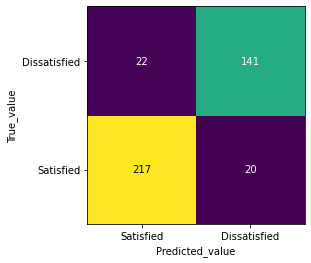

In [261]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [262]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.92      0.91      0.91       239
Dissatisfied       0.87      0.88      0.87       161

    accuracy                           0.90       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.90      0.90      0.90       400



In [263]:
report_table = report_table + [['SVC RBF ', 'C=10 & Penalty = l2', rbfss.score(Xtrainpcass, ytrainss2)*100, 
                                rbfss.score(Xtrainpcass, ytrainss2)*100,
                                f1_score(ytestss2,rbfss.predict(Xtestpcass))]]

### SVC kernel "Linear"

In [264]:
linss = SVC(kernel='linear', C=100)

linss.fit(Xtrainpcass, ytrainss2)
ypredss2 = linss.predict(Xtestpcass)

print('Train score for SVC kernel - Linear with PCA: {:.3f}'.format(linss.score(Xtrainpcass,ytrainss2)))
print('Test score for SVC kernel - Linear with PCA : {:.3f}'.format(linss.score(Xtestpcass,ytestss2)))

Train score for SVC kernel - Linear with PCA: 0.865
Test score for SVC kernel - Linear with PCA : 0.838


In [265]:
conss = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(conss))


matrix 
[[206  32]
 [ 33 129]]


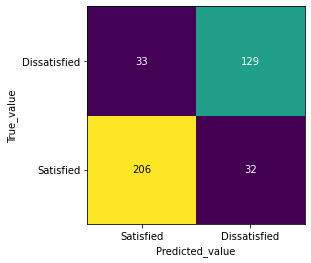

In [266]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")



In [267]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.87      0.86      0.86       239
Dissatisfied       0.80      0.80      0.80       161

    accuracy                           0.84       400
   macro avg       0.83      0.83      0.83       400
weighted avg       0.84      0.84      0.84       400



In [268]:
report_table = report_table + [['SVC Linear ', 'C=10 & Penalty = l2', linss.score(Xtrainpcass, ytrainss2)*100, 
                                linss.score(Xtrainpcass, ytrainss2)*100,
                                f1_score(ytestss2,linss.predict(Xtestpcass))]]

### SVC with "Poly"

In [269]:
polyss = SVC(kernel='poly', C=100)

polyss.fit(Xtrainpcass, ytrainss2)
ypredss2 = polyss.predict(Xtestpcass)

print('Train score for SVC kernel - poly with PCA: {:.3f}'.format(polyss.score(Xtrainpcass,ytrainss2)))
print('Test score for SVC kernel - poly with PCA : {:.3f}'.format(polyss.score(Xtestpcass,ytestss2)))

Train score for SVC kernel - poly with PCA: 0.996
Test score for SVC kernel - poly with PCA : 0.845


In [270]:
conss = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(conss))

matrix 
[[205  28]
 [ 34 133]]


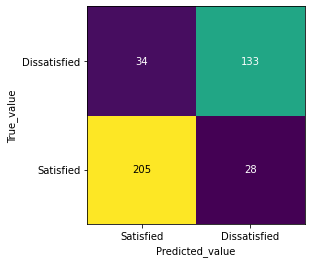

In [271]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(
    confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [272]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.88      0.86      0.87       239
Dissatisfied       0.80      0.83      0.81       161

    accuracy                           0.84       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.84      0.85       400



In [273]:
report_table = report_table + [['SVC Poly ', 'C=10 & Penalty = l2', polyss.score(Xtrainpcass, ytrainss2)*100, 
                                polyss.score(Xtrainpcass, ytrainss2)*100,
                                f1_score(ytestss2,polyss.predict(Xtestpcass))]]

# PCA with Decision Tree

#### Grid search for decision tree

In [274]:
paramgridss = {'max_depth' : range(1,20)}

gridsearchpcass = GridSearchCV(DecisionTreeClassifier(), paramgridss, cv=5, return_train_score=True, n_jobs = -1, verbose = True)
gridsearchpcass.fit(Xtrainpcass, ytrainss2)

print("Best parameters:",(gridsearchpcass.best_params_))
print("Best cross-validation score:",(gridsearchpcass.best_score_))

Fitting 5 folds for each of 19 candidates, totalling 95 fits
Best parameters: {'max_depth': 5}
Best cross-validation score: 0.849375


#### using the best parameters 

In [275]:
dtreess = DecisionTreeClassifier(max_depth=5, random_state=0)
dtreess.fit(Xtrainpcass, ytrainss2)
ypredss2 = dtreess.predict(Xtestpcass)


print("Train Score with PCA: ",(dtreess.score(Xtrainpcass, ytrainss2)))
print("Test Score  with PCA :",(dtreess.score(Xtestpcass, ytestss2)))

Train Score with PCA:  0.9025
Test Score  with PCA : 0.85


In [276]:
conss = confusion_matrix(ypredss2,ytestss2)
print("matrix \n{}".format(conss))

matrix 
[[211  32]
 [ 28 129]]


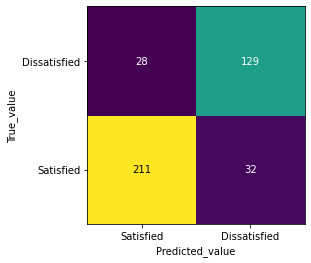

In [277]:
import mglearn
%matplotlib inline

imagess = mglearn.tools.heatmap(confusion_matrix(ypredss2, ytestss2), xlabel = 'Predicted_value',
    ylabel='True_value', xticklabels = ['Satisfied','Dissatisfied'],
    yticklabels=['Satisfied','Dissatisfied'], fmt="%d")


In [278]:
print(classification_report(ytestss2, ypredss2, target_names=['Satisfied','Dissatisfied']))

              precision    recall  f1-score   support

   Satisfied       0.87      0.88      0.88       239
Dissatisfied       0.82      0.80      0.81       161

    accuracy                           0.85       400
   macro avg       0.84      0.84      0.84       400
weighted avg       0.85      0.85      0.85       400



## Scores from Project 2

In [279]:
report_table = report_table + [['Decision Tree ', 'C=10 & Penalty = l2', dtreess.score(Xtrainpcass, ytrainss2)*100, 
                                dtreess.score(Xtrainpcass, ytrainss2)*100,
                                f1_score(ytestss2,dtreess.predict(Xtestpcass))]]

In [280]:
report = pd.DataFrame(report_table,columns = ['Model name','Model parameter', 'Train accuracy %', 'Test accuracy %', 'F1- score'])
report.index = report['Model name']
report.round(3)

,Model name,Model parameter,Train accuracy %,Test accuracy %,F1- score
Model name,,,,,
KNN Classification,KNN Classification,K=9,89.062,89.062,0.818
Logistic Regression,Logistic Regression,C=10 & Penalty = l2,86.062,86.062,0.796
Linear SVM,Linear SVM,C=10 & Penalty = l2,84.625,84.625,0.793
SVC RBF,SVC RBF,C=10 & Penalty = l2,93.312,93.312,0.870
SVC Linear,SVC Linear,C=10 & Penalty = l2,86.500,86.500,0.799
SVC Poly,SVC Poly,C=10 & Penalty = l2,99.625,99.625,0.811
Decision Tree,Decision Tree,C=10 & Penalty = l2,90.250,90.250,0.811


## Scores from project 1

In [281]:
report = []
report += [["KNN Classification","n=6" ,'1', '0.8825', '0.8488']]
report += [["Logistic Regression","C=10 , max iter =39",'0.8656', '0.8550', '0.8231']]
report += [["Linear SVM Classifier","C=1 & Max_iter=47",'0.8556', '0.8325', '0.8046']] 
report += [["Kernalized SVM rbf Classifier",'C=0.01 & gamma = 1','0.5537', '0.5975','0.000']]
report += [["Kernalized SVM Linear Classifier",'C=0.01 & gamma = 1','0.8337', '0.8175','0.8352']]
report += [["Kernalized poly SVM Classifier",'C=0.01 & gamma = 1','0.8906', '0.8925','0.8479']]
report += [["Decision Tress Classifier",'Max depth =5','0.9125', '0.8825','0.8571']]

In [282]:
reporta = pd.DataFrame(report,columns = ['Model name','Model parameter', 'Train accuracy %', 'Test accuracy %','F1- score' ])
reporta.index = reporta['Model name']
reporta

,Model name,Model parameter,Train accuracy %,Test accuracy %,F1- score
Model name,,,,,
KNN Classification,KNN Classification,n=6,1,0.8825,0.8488
Logistic Regression,Logistic Regression,"C=10 , max iter =39",0.8656,0.8550,0.8231
Linear SVM Classifier,Linear SVM Classifier,C=1 & Max_iter=47,0.8556,0.8325,0.8046
Kernalized SVM rbf Classifier,Kernalized SVM rbf Classifier,C=0.01 & gamma = 1,0.5537,0.5975,0.000
Kernalized SVM Linear Classifier,Kernalized SVM Linear Classifier,C=0.01 & gamma = 1,0.8337,0.8175,0.8352
Kernalized poly SVM Classifier,Kernalized poly SVM Classifier,C=0.01 & gamma = 1,0.8906,0.8925,0.8479
Decision Tress Classifier,Decision Tress Classifier,Max depth =5,0.9125,0.8825,0.8571


# Comparision of result of PCA for all models with project 1

#### For logistic regression the test accuracy after PCA increased from 85.5% to 86.06f%. Kernalized SVM rbf Classifier shows a lot of improvement after PCA. The test accuracy for this went up from 59.75% to 93.31%. Decision tree test accuracy shows an improvement of 2%. However, F-score for all models except Kernalized SVM rbf Classifier have dropped. 

# Neural Networks - Classification

In [283]:
from keras.models import Sequential
from keras.layers import Dense



#### Grid search

In [284]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(12, input_dim=17, activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [285]:
from keras.wrappers.scikit_learn import KerasClassifier
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_searchdpl = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [287]:
grid_search_resultdpl = grid_searchdpl.fit(Xtrainpcass, ytrainss2)

In [288]:
print("Grid Search deep learning Best parameter:{:}".format(grid_search_resultdpl.best_params_))
print("Grid Search deep learning Best score: {:}".format(grid_search_resultdpl.best_score_))

Grid Search deep learning Best parameter:{'batch_size': 30, 'epochs': 100}
Grid Search deep learning Best score: 0.9037500023841858


In [289]:
# create model
modelss = Sequential()
modelss.add(Dense(12, input_dim=17, activation='relu'))
modelss.add(Dense(8, activation='relu'))
modelss.add(Dense(1, activation='sigmoid'))

In [290]:
# Compile model
modelss.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [291]:
modelss.fit(Xtrainpcass, ytrainss2, epochs=50, batch_size=10)

Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 0.6590 - accuracy: 0.5718
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5597 - accuracy: 0.7529
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.4431 - accuracy: 0.8466
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8689
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3398 - accuracy: 0.8734
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3374 - accuracy: 0.8682
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.3012 - accuracy: 0.8847
Epoch 8/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2856 - accuracy: 0.8837
Epoch 9/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8743
Epoch 10/50
160/160 [==============================] - 0s 2ms/step - loss: 0.2599 - accuracy: 0.8999

In [292]:
# Evaluating the Model and calculating the accuracy
scoresss = modelss.evaluate(Xtestpcass, ytestss2)
print("\n%s: %.2f%%" % (modelss.metrics_names[1], scoresss[1]*100))

13/13 [==============================] - 0s 3ms/step - loss: 0.2728 - accuracy: 0.8850

accuracy: 88.50%


In [293]:
y_predict = modelss.predict(Xtestpcass)
y_predict

array([[2.61151791e-03],
       [9.89907980e-01],
       [8.31687510e-01],
       [6.71149850e-01],
       [9.13978815e-01],
       [9.93284941e-01],
       [9.90157366e-01],
       [4.52265143e-03],
       [8.30345452e-01],
       [9.95795727e-01],
       [3.33131552e-01],
       [1.27876371e-01],
       [1.10853583e-01],
       [9.94905472e-01],
       [9.35680568e-01],
       [7.86891580e-03],
       [4.19069231e-02],
       [7.30368495e-03],
       [1.07537806e-02],
       [4.06001806e-02],
       [7.60221601e-01],
       [8.45107436e-03],
       [9.66212511e-01],
       [4.18663025e-04],
       [1.46269798e-03],
       [9.98038411e-01],
       [1.37195885e-02],
       [2.54951417e-02],
       [9.99013782e-01],
       [9.94228125e-01],
       [7.00866342e-01],
       [9.97232854e-01],
       [9.95360494e-01],
       [3.04602087e-02],
       [9.95495975e-01],
       [1.49383247e-02],
       [1.74519420e-03],
       [7.75959730e-01],
       [9.98345137e-01],
       [1.30343914e-01],


## Model 2 (Without PCA)


In [294]:
# create model
modelss = Sequential()
modelss.add(Dense(12, input_dim=25, activation='relu'))
modelss.add(Dense(8, activation='relu'))
modelss.add(Dense(1, activation='sigmoid'))

In [295]:
# Compile model
modelss.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [296]:
modelss.fit(Xtrainss2, ytrainss2, epochs=50, batch_size=10)

Epoch 1/50
160/160 [==============================] - 1s 2ms/step - loss: 1.3282 - accuracy: 0.5623
Epoch 2/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7454 - accuracy: 0.6099
Epoch 3/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7423 - accuracy: 0.6086
Epoch 4/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6889 - accuracy: 0.6310
Epoch 5/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6650 - accuracy: 0.6817
Epoch 6/50
160/160 [==============================] - 0s 2ms/step - loss: 0.7611 - accuracy: 0.6422
Epoch 7/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6944 - accuracy: 0.6825
Epoch 8/50
160/160 [==============================] - 0s 2ms/step - loss: 0.5938 - accuracy: 0.7278
Epoch 9/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6491 - accuracy: 0.6859
Epoch 10/50
160/160 [==============================] - 0s 2ms/step - loss: 0.6202 - accuracy: 0.7046

In [298]:
# Evaluating the Model and calculating the accuracy
scoresss = modelss.evaluate(xtestss2, ytestss2)
print("\n%s: %.2f%%" % (modelss.metrics_names[1], scoresss[1]*100))

13/13 [==============================] - 0s 1ms/step - loss: 0.5019 - accuracy: 0.8125

accuracy: 81.25%


Accuracy of model increased by 7.25 % with PCA 